In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv
/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv


In [13]:
validation = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv', header = None, names =['ids', 'category', 'sentiment', 'description'])
train = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv', header = None, names =['ids', 'category', 'sentiment', 'description'])

In [14]:
validation.head()

,ids,category,sentiment,description
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [15]:
train.head()

,ids,category,sentiment,description
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ids          74682 non-null  int64 
 1   category     74682 non-null  object
 2   sentiment    74682 non-null  object
 3   description  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [17]:
train.describe()

,ids
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [18]:
train.count()

ids            74682
category       74682
sentiment      74682
description    73996
dtype: int64

In [20]:
train['category'].nunique()

32

In [21]:
train.isnull().sum()

ids              0
category         0
sentiment        0
description    686
dtype: int64

In [22]:
train = train.fillna('')

In [23]:
train.isnull().sum()

ids            0
category       0
sentiment      0
description    0
dtype: int64

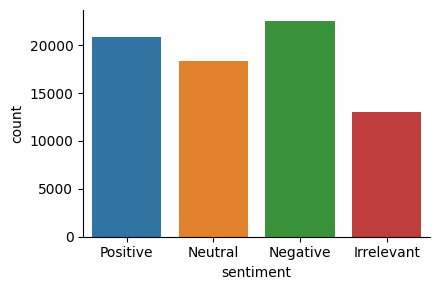

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
#create a bar chat using sns
sns.catplot(x = 'sentiment', kind = 'count', data = train, height=3, aspect=1.5)
plt.show()

In [25]:
train.category.unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [26]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Precompile regex patterns
url_pattern = re.compile(r'http\S+')
special_chars_pattern = re.compile(r'[^a-zA-Z\s]')

def clean_text(text):
    # Remove URLs using precompiled regex pattern
    text = url_pattern.sub('', text)
    
    # Remove special characters and numbers using precompiled regex pattern
    text = special_chars_pattern.sub('', text)
    
    # Convert to lowercase directly in regex for efficiency
    text = text.lower()
    
    # Tokenize the text to get a list of terms
    tokens = word_tokenize(text)
    
    # Remove stop words using a set for fast lookup
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # Join the tokens back into a cleaned text string
    cleaned_text = ' '.join(filtered_tokens)
    
    return cleaned_text


In [27]:
train['cleaned_description'] = train['description'].apply(clean_text)
train.head()

,ids,category,sentiment,description,cleaned_description
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting borderlands murder
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,coming borders kill
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting borderlands kill
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming borderlands murder
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting borderlands murder


In [28]:
validation['cleaned_description'] = validation['description'].apply(clean_text)
validation.head()

,ids,category,sentiment,description,cleaned_description
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...,mentioned facebook struggling motivation go ru...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon boss jeff bezos rejects claims...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,microsoft pay word functions poorly samsungus ...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking full closet hacking truly awf...
4,4433,Google,Neutral,Now the President is slapping Americans in the...,president slapping americans face really commi...


In [46]:
#feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

#Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features = 5000)
X = vectorizer.fit_transform(train['cleaned_description'])
y = train['sentiment']
X_val = vectorizer.transform(validation['cleaned_description'])
y_val = validation['sentiment']
print(X.shape,y.shape)
print(X_val.shape,y_val.shape)

(74682, 5000) (74682,)
(1000, 5000) (1000,)


In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay

# Initialize Naive Bayes classifier
clf = DecisionTreeClassifier(criterion='gini',splitter = "random")

# Train the classifier on TF-IDF features and sentiment labels
clf.fit(X, y)
y_pred = clf.predict(X_val)


In [45]:
validation.sentiment.unique()

array(['Irrelevant', 'Neutral', 'Negative', 'Positive'], dtype=object)

0.921


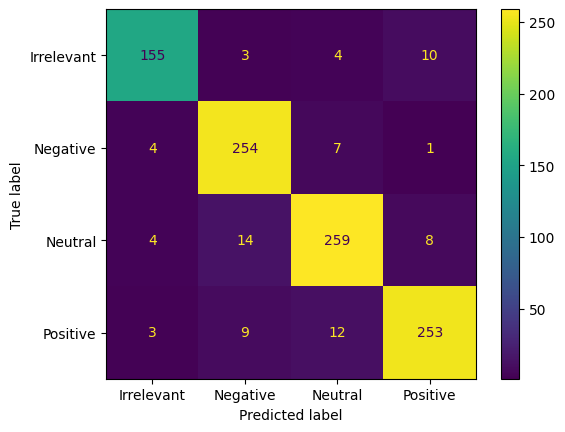

In [49]:
print(accuracy_score(y_val,y_pred))
ConfusionMatrixDisplay.from_predictions(y_val,y_pred)